In [22]:
import pandas as pd
from textblob import TextBlob
import seaborn as sns

In [3]:
df1=pd.read_csv(r'D:/Datasets/UTA2019/CleanedData_2.csv')

C:\Users\priya\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (2,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [68]:
df1.shape

(202406, 13)

In [7]:
df2=pd.read_csv(r'D:/Datasets/UTA2019/P1ProductData_UTA2019.csv')

In [8]:
df2.head(5)

,SKU,ProductName,CountOfBigTransactions,ClassID,Weight,Width,Depth,Height,LifeCycleName,FinishName,Color,Season,SizeOrUtility,Material,CountryOfOrigin,Quartile,display-name,online-flag,long-description
0,2790275,RPL HDW COLETTE LEGS,0,9801,1.10,3.35,3.35,11.93,FUT,NaN,Brown - Espresso,NaN,NaN,NaN,China,1,NaN,NaN,NaN
1,3191777,google express,0,7590,1.00,1.00,1.00,1.00,FUT,NaN,Blue,NaN,NaN,NaN,United States,1,NaN,NaN,NaN
2,2842220,X14 ORN JINGLE BELL SILVER $,0,1506,0.04,2.00,2.00,2.00,FUT,NaN,Silver,HOLIDAY,D300 - ORNAMENTS,METAL,China,1,NaN,NaN,NaN
3,3888295,"REUSABLE BAGS, PROMO V.#2",0,9801,0.15,20.00,6.00,16.00,FUT,NaN,Multi-colored,NaN,NaN,NaN,Viet Nam,1,NaN,NaN,NaN
4,3186445,DISPLAY CRTN AURA MINERAL,0,9801,0.59,9.50,0.01,11.00,FUT,NaN,Gray - Dove,NaN,NaN,NaN,China,1,NaN,NaN,NaN


In [4]:
df1.shape

(202406, 12)

In [5]:
df1.head(5)

,id,name,sku,title,questioncount,answercount,reviewcount,commentcount,averagerating,text,tags,dateTime
0,2.0,Antonio Russo,3127014,Love my mermaid pillow,0,0,21,0,0.0,Another great Pier 1 quality product.,NaN,2017-08-02T14:39:50
1,4.0,Audrey Audrey,3019613,NaN,0,0,21,0,0.0,The coloring on this is so pretty! I love the ...,NaN,2017-08-02T14:47:34
2,5.0,Audrey Audrey,3205114,NaN,0,0,4,0,0.0,Very comfortable and easy to take care of.,NaN,2017-08-02T14:48:01
3,6.0,Audrey Audrey,3084816,NaN,0,0,1,0,4.0,"Pretty design, great quality. I love it.",NaN,2017-08-02T14:49:03
4,7.0,monica maltby,2916178,Lovely lamp!,0,0,1,0,5.0,I love this lamp - it matches my Living room p...,NaN,2017-08-02T21:12:54


In [86]:
df1.groupby('sku')['Sentiment'].mean()

sku
1872426     0.044444
2043881     0.500000
2064021     0.000000
2118072     0.000000
2121139     0.479167
2121141     0.350000
2121167     0.250505
2121195     0.000000
2132994     0.166667
2140332     0.227778
2156768     0.333705
2197699     0.570040
2221815     0.237857
2222469     0.250000
2222612     0.000000
2224533     0.112500
2224546     0.000000
2230305     0.000000
2248874     0.245833
2252898     0.700000
2257624     0.293750
2261334     1.000000
2262473     0.000000
2262718     0.062500
2270125     0.000000
2274409     0.250000
2279505     0.214286
2279561     0.000000
2279574     0.000000
2282578     0.587500
              ...   
PS78452     0.491667
PS78457     0.360606
PS78461     0.350000
PS78609     0.071212
PS78634     0.346764
PS78647     0.737500
PS78659     0.591071
PS78660     0.312500
PS79139     0.422500
PS79168     0.135490
PS79187     0.482143
PS79419    -0.025446
PS80706     0.120758
PS82058     0.500000
PS82060     0.200000
PV530-21    0.100000
PV530-22 

In [74]:
df2.shape

(37377, 19)

In [84]:
len(df2['SKU'].unique())

37123

In [16]:
df1.isna().sum()

id                   1
name                 0
sku                  0
title            51153
questioncount        0
answercount          0
reviewcount          0
commentcount         0
averagerating        0
text                 3
tags             75735
dateTime             0
dtype: int64

In [55]:
df1['text'].fillna(' ',inplace=True)

In [58]:
x=[]

for sentence in df1['text']:
    blob = TextBlob(sentence)
    if blob.sentiment.polarity==' ':
        x.append(0)
    else:
        x.append(blob.sentiment.polarity)

In [60]:
df1['Sentiment']=x

C:\Users\priya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


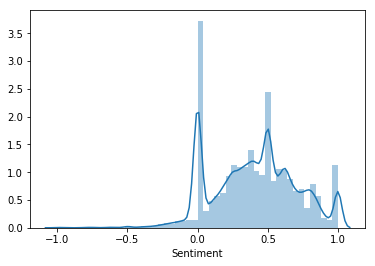

In [61]:
sns.distplot(df1['Sentiment'])

In [66]:
print(df1[['text','Sentiment']][1:25])

                                                 text  Sentiment
1   The coloring on this is so pretty! I love the ...   0.406250
2          Very comfortable and easy to take care of.   0.476667
3            Pretty design, great quality. I love it.   0.516667
4   I love this lamp - it matches my Living room p...   0.500000
5                    Love the product and the service   0.500000
6   I love this scent.  Every time I smell it, it ...   0.258333
7   Perfect for snacks or veggies and looks beautiful   0.925000
8   I love when it's all lit up at night with my c...   0.500000
9   Beautiful lanterns ... Look expensive and perf...   0.450000
10  I so love this chair! The velvet fabric is ver...   0.572500
11        Soft and beautiful throw. Washes very well.   0.383333
12  I love the Moscow Mule Mugs! I definitely reco...   0.145833
13         Looks perfect with the chairs on my porch.   1.000000
14  Love the mobile. Sometimes hard to find the of...   0.293056
15                     Lo

In [67]:
df1.to_csv('withsentiment.csv')

In [64]:
x=[]
for i in ['Worst','Scent is not like candle','I love the multiple types of fiber arts']:
    blob = TextBlob(i)
    x.append(blob.sentiment.polarity)

In [65]:
print (x)

[-1.0, 0.0, 0.25]


In [6]:
df1['text'].isna().sum()

3